<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Worksheets/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)

df.head()


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [2]:
from datetime import datetime, timezone

df["date"] = pd.to_datetime(df.date)
df.dtypes

df["year"] = df.date.dt.year
df["month_num"] = df.date.dt.month
df["month"] = df["date"].dt.strftime("%B")
df["day"] = df.date.dt.day

# set the index to the date column
df.set_index("date", inplace=True)

df_sorted = df.sort_values("value")
df_sorted

,value,year,month_num,month,day
date,,,,,
2016-05-09,1201,2016,5,May,9
2016-05-11,1716,2016,5,May,11
2016-05-10,2329,2016,5,May,10
2016-05-16,2591,2016,5,May,16
2016-05-15,2927,2016,5,May,15
...,...,...,...,...,...
2019-11-15,314101,2019,11,November,15
2019-08-06,337325,2019,8,August,6
2019-08-07,341595,2019,8,August,7


In [3]:
import seaborn as sns
from scipy.stats import linregress

#Removing outliers from df

def remove_outliers(df, column):
  upper_limit = df[column].quantile(0.975)
  lower_limit = df[column].quantile(0.025)
  # interq_range = upper_q - lower_q
  # print(interq_range)
  # upper_limit = (upper_q + 1.5 * interq_range) 
  # lower_limit = (lower_q - 1.5 * interq_range) 
  print(upper_limit, lower_limit)
  #filter all the non outlier values to give a normalised df.
  df_normal = df[(df[column]>=lower_limit)]
  df_normal = df_normal[(df_normal[column]<=upper_limit)]

  return df_normal


df_normal = remove_outliers(df_sorted, "value")
df_normal


177613.075 17876.4


,value,year,month_num,month,day
date,,,,,
2016-05-26,18060,2016,5,May,26
2016-06-08,18072,2016,6,June,8
2016-06-09,18139,2016,6,June,9
2016-06-07,18335,2016,6,June,7
2016-06-15,18584,2016,6,June,15
...,...,...,...,...,...
2019-09-09,174212,2019,9,September,9
2018-10-15,174639,2018,10,October,15
2018-10-12,176175,2018,10,October,12


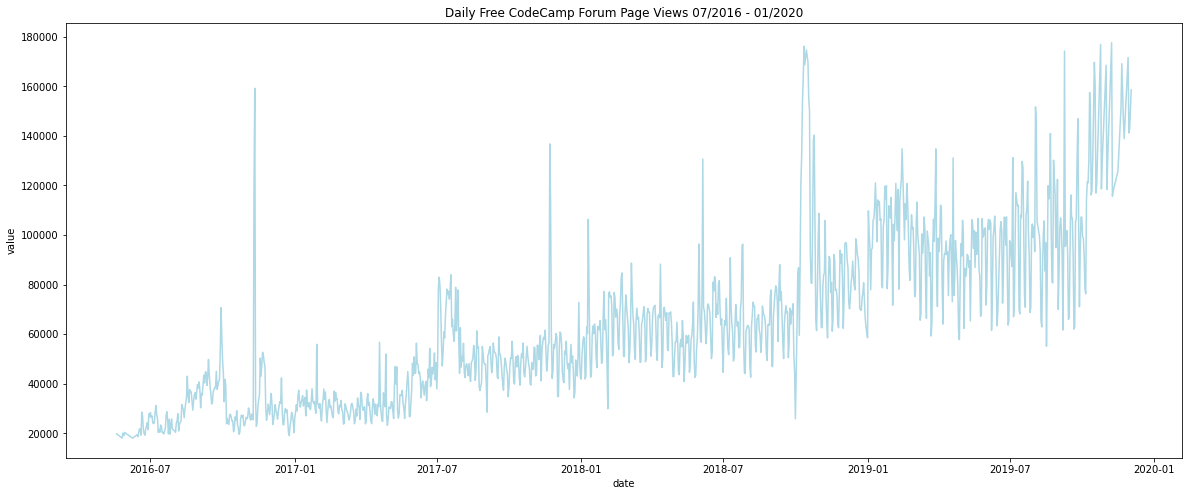

In [4]:
def display_lineplot(df, column):
  #create a subset of the df using only the net_per_10K columns and find their means.
  data = df[column]
  
  #plot the chart of the data means and get labels from the years column
  plt.figure(figsize=(20, 8))
  chart = sns.lineplot(data=data, color='lightblue')
  #make a lables list from the keys of your subset df.
  # labels = df.index
  #chart.set_xticklabels( rotation=45)
  plt.title("Daily Free CodeCamp Forum Page Views 07/2016 - 01/2020")
  sns.set_style("whitegrid")

display_lineplot(df_normal, "value")

### We used seaborn to plot the line chart but used matplotlib to give us titles and figure size.

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


month_num,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


<Figure size 1080x576 with 0 Axes>

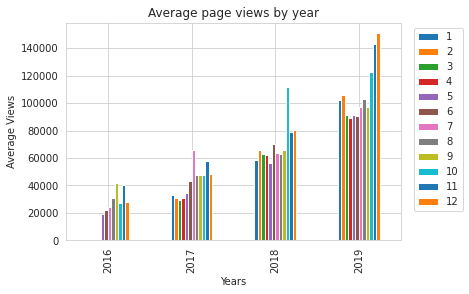

<Figure size 1080x576 with 0 Axes>

In [21]:
# df_pivot = pd.pivot_table(
#       df, 
#       values = 'column1 name',
#       index = 'column2 name', 
#       columns = 'column3 name',
#       aggfunc = np.mean
#       )

import numpy as np

def create_pivot(df):
  #add code below which creates a pivot table of Pop and State 
  pageviews_pivot = pd.pivot_table(df, values = "value", index = "year", columns = "month_num", aggfunc = np.mean )
  return pageviews_pivot

#save series in a new variable
plt.figure(figsize=(15, 8))
pageviews_pivot = create_pivot(df_normal)
pageviews_pivot.plot(kind='bar', xlabel = 'Years', ylabel = 'Average Views', title = 'Average page views by year').legend(bbox_to_anchor=(1.2, 1), )
plt.figure(figsize=(15, 8))
pageviews_pivot.head(10)


###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


TypeError: ignored

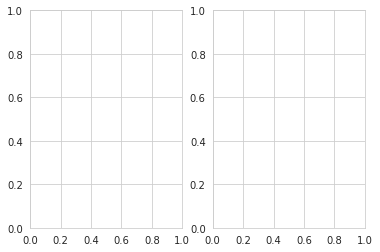

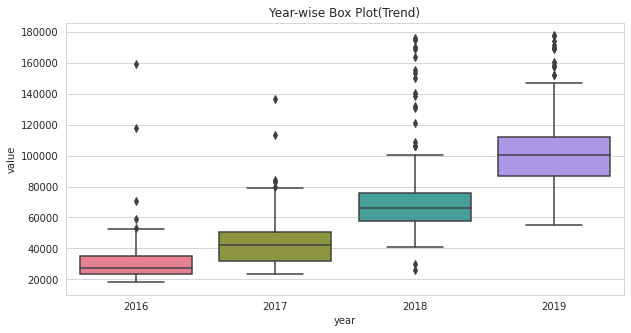

In [24]:
fig, axes = plt.subplots(1,2)

plt.figure(figsize=(10, 5))
axes[0][0].bplot = sns.boxplot(y="value", x= "year", data = df_normal, width = 0.8, palette ="husl").set(title = "Year-wise Box Plot(Trend)")
plt.xlabel ("Years", size=12)
plt.ylabel("Page Views ", size=12)
bplot


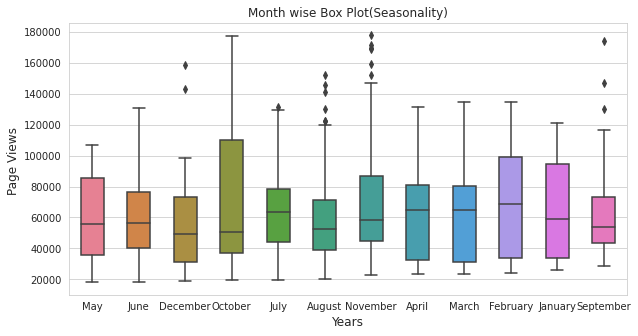

In [18]:
plt.figure(figsize=(10, 5))
bplot = sns.boxplot(y="value", x= "month", data = df_normal, width = 0.5, palette ="husl")
plt.xlabel ("Years", size=12)
plt.ylabel("Page Views ", size=12)
plt.title("Month wise Box Plot(Seasonality)")
bplot

###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


# Reflect

What caused the biggest problems?
How did you solve these problems?